In [1]:
from bs4 import BeautifulSoup
import contractions

In [2]:

# install and import necessary libraries.

import re, string, unicodedata                          # Import Regex, string and unicodedata.                                  # Import contractions library.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

# Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns
import matplotlib.pyplot as plt


# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1123)>


In [3]:
# Loading data into pandas dataframe
data = pd.read_csv("ecommerceDataset.csv")
data.head()

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


## **Exploratory Data Analysis(EDA)**

In [4]:
data.shape   

(50424, 2)

In [5]:
data.info()    #information of all columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   50424 non-null  object
 1   Text    50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


**Observations:**
* First column is `Labels` and object datatype
* Seocond column is `Text` and object datatype

In [6]:
# View some basic statistical details like percentile, mean, std etc. of a data frame of numeric values. 
data.describe()

,Label,Text
count,50424,50423
unique,4,27801
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19312,30


**Observations:**
* `Label` has 4 unique values, `Text` has 27801 unique values

In [7]:
data.isnull().sum(axis=0)          # Check for NULL values.

Label    0
Text     1
dtype: int64

In [8]:
data = data.dropna(axis=0)                 # Remove rows in which null values are present

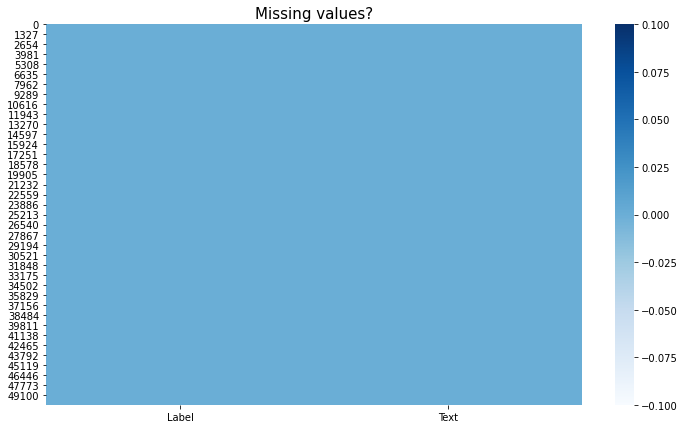

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

**The observations:**
* The lack of lines in the above heatmap shows that there are no missing values

In [10]:
# Get the unique values of every column
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [11]:
unival = return_unique_values(data)
print(unival)

  Features  Uniques
0    Label        4
1     Text    27801


In [12]:
labels = data['Label'].unique()

In [13]:
print(labels)

['Household' 'Clothing & Accessories' 'Electronics' 'Books']


In [14]:
data.head(5)

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


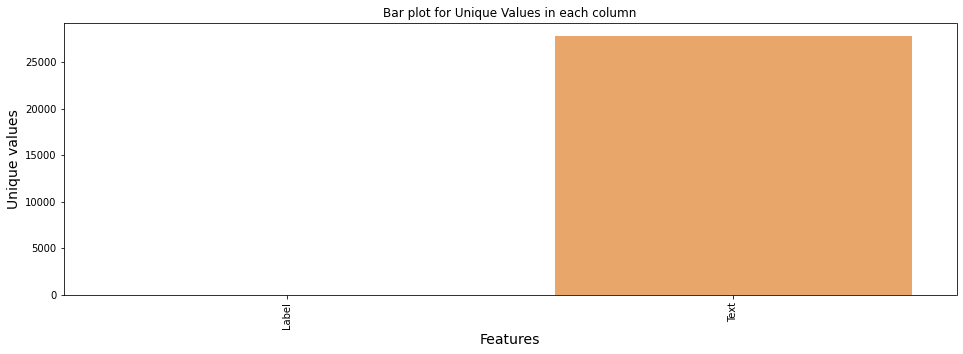

In [15]:
# plot the count of unique values in every column
f, ax = plt.subplots(1,1, figsize=(16,5))
sns.barplot(x=unival['Features'], y=unival['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

### **Word Cloud for Product Description: `Clothing & Accessories`**

In [16]:
pip install wordcloud

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
from wordcloud import WordCloud,STOPWORDS

In [18]:
#creating word cloud for Clothing & Accessories
product_description=data[data['Label']=='Clothing & Accessories']
words = ' '.join(product_description['Text'])
cleaned_word = " ".join([word for word in words.split()])

In [19]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

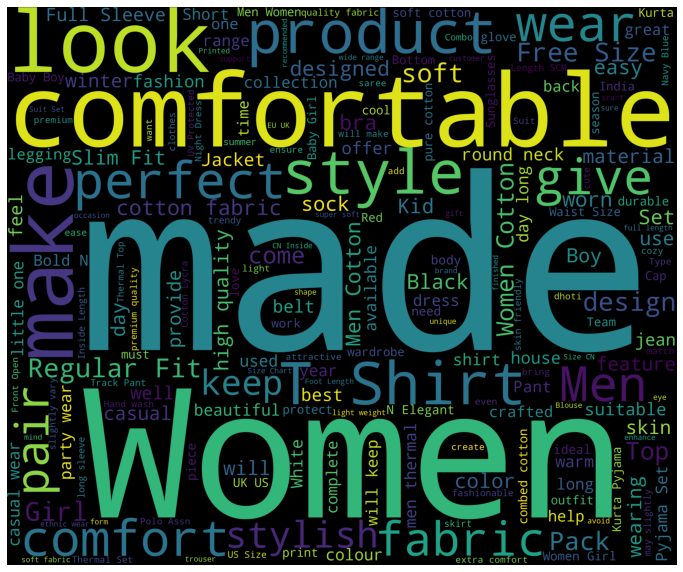

In [20]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Word Cloud for Product Description: `Household`**

In [21]:
#creating word cloud for `Household`
product_description=data[data['Label']=='Household']
words = ' '.join(product_description['Text'])
cleaned_word = " ".join([word for word in words.split()])

In [22]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

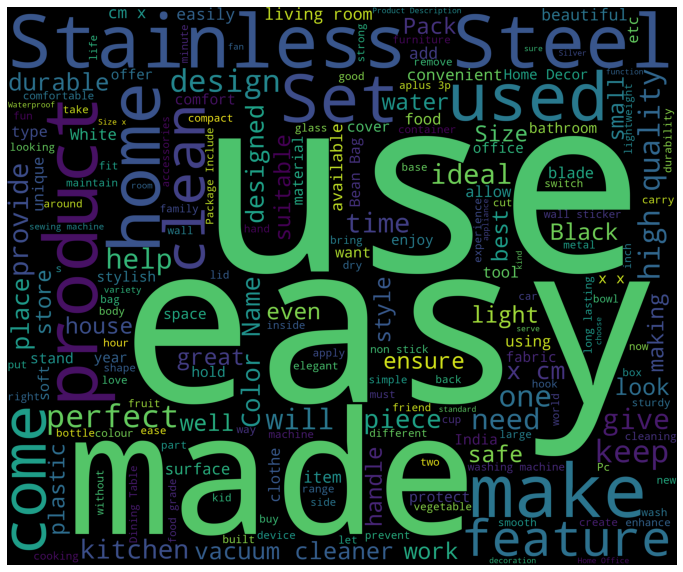

In [23]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Word Cloud for Product Description: `Electronics`**

In [24]:
#creating word cloud for `Electronics
product_description=data[data['Label']=='Electronics']
words = ' '.join(product_description['Text'])
cleaned_word = " ".join([word for word in words.split()])

In [25]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

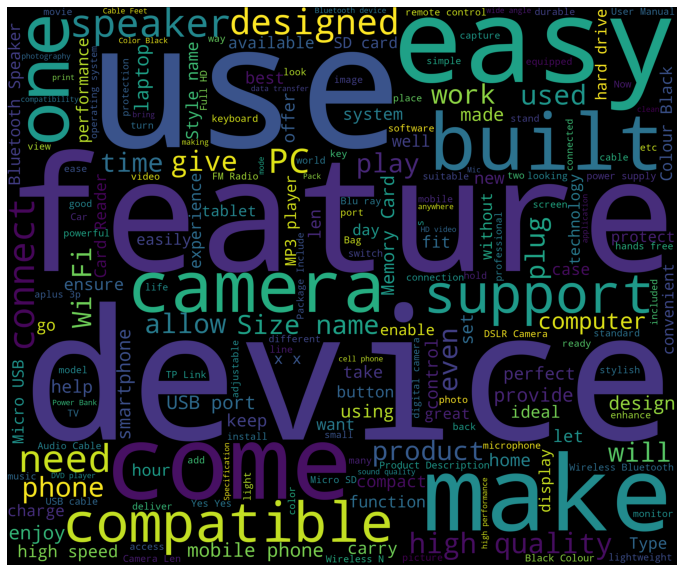

In [26]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Word Cloud for Product Description: `Books`**

In [27]:
#creating word cloud for `Books`
product_description=data[data['Label']=='Books']
words = ' '.join(product_description['Text'])
cleaned_word = " ".join([word for word in words.split()])

In [28]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

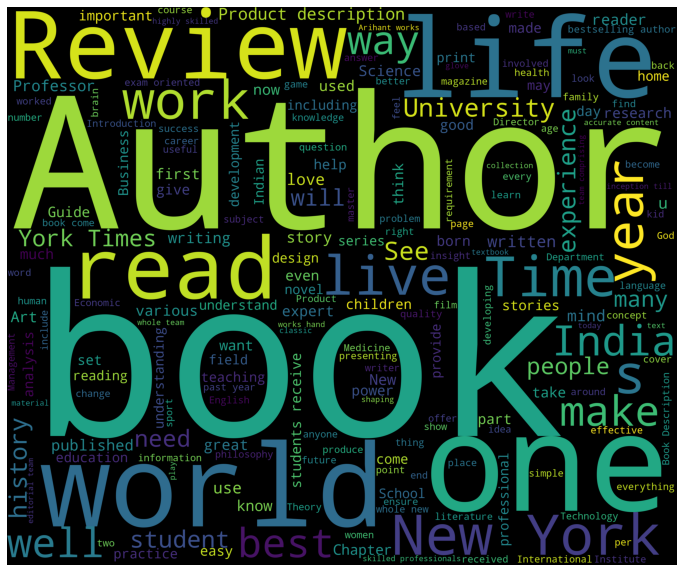

In [29]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Text preprocessing: Data preparation
- Html tag removal
- Tokenization
- Remove the numbers
- Removal of Special Characters and Punctuations
- Removal of stopwords
- Conversion to lowercase
- Lemmatize or stemming
- Join the words in the list to convert back to text string in the data frame. (So that each row
     contains the data in text format.)
- Print the first 5 rows of data after pre-processing

In [30]:
data = data[["Text","Label"]]

In [31]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()  

,Text,Label
0,"Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories",Household
1,"Cuisinart CCO-50BKN Deluxe Electric Can Opener, Black Size:None | Color Name:Black Style, convenience, and power come together in the Cuisinart electric can open. With chrome accents and elegant contours, it fits nicely with other modern countertop appliances. The easy single-touc",Household
2,Anchor Penta 6 Amp 1 -Way Switch (White) - Pack of 20 Anchor Penta 6 Amp 1 -Way Switch (White)- Pack of 20 comes with Spark Shield - Concealed Terminals - Silver Cadmium Contacts - IP 20 Protection - Captive Screw.,Household
3,"Proline Men's Track Jacket Proline Woven, 100% Polyester High neck Wind Cheater with colour Blocked Detail",Clothing & Accessories
4,"Chef's Garage 2 Slot Edge Grip Kitchen Knife Sharpener, Helps to Sharpen The Dull Knives (Black) Chef's Garage Mini Knife sharpener helps to sharpen your dull knives. This tiny knife sharpener has 2 stage sharpening system. First stage is for damaged and dull knives, it will sharpen the knife on the coarse slot. The coarse slot is made of carbide. Second stage is fine slot, once you have honed the knife on coarse slot it will helps to give the finishing touch. The fine slot is made of ceramic for fine sharpening. It’s give a quick touch up on already sharper knives or for finishing off knives that have already passed through the coarse slot.Also it comes with one of the unique edge grip feature to sharpen on the edge of the table or counter top. Key Features: Very easy to use. Non-slip base for added stability and control Carbide and ceramic blades on these sharpening slots are long lasting. Strong and hard with flexibility of an edge grip feature for bigger knives Small in size 9.50 x 5.0 x 4.50 cms. Weights less - 70 grams Instructions:1. Insert the blade into the slot at a 90-degree angle to the mini sharpener.2. Place the edge in coarse slot (Black in color)3. Pull the knife straight back towards you 2 to 3 times while applying a light pressure.4. Place the blade in fine slot (White in color)5. Pull the knife straight back towards you 5 to 6 times while applying a heavy pressure.6. If blade is still dull repeat these steps until blade is sharp.",Household


In [32]:
#remove the html tags
def strip_html(Text):
    soup = BeautifulSoup(Text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(Text):
    """Replace contractions in string of text"""
    return contractions.fix(Text)

#remove the numericals present in the text
def remove_numbers(Text):
  text = re.sub(r'\d+', '', Text)
  return Text

# remove the url's present in the text
def remove_url(Text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',Text)
    return Text

# remove the mentions in the tweets
def remove_mention(Text):
    text = re.sub(r'@\w+','',Text)
    return Text

def clean_text(Text):
    text = strip_html(Text)
    text = replace_contractions(Text)
    text = remove_numbers(Text)
    text = remove_url(Text)
    text = remove_mention(Text)
    return Text
data['Text'] = data['Text'].apply(lambda x: clean_text(x))
data.head()

,Text,Label
0,"Styleys Wrought Iron Coat Rack Hanger Creative Fashion Bedroom for Hanging Clothes Shelves, Wrought Iron Racks Standing Coat Rack (Black) Color Name:Black Styleys Coat Stand is great for homes and rooms with limited space, as having one standing rack takes up less space compared to drawers and cupboards. Easy for guests to keep their items, especially bags and scarves, when visiting, as they can always keep an eye on it and easily grab it when they're leaving. Makes a smart décor piece for your home or room as occupied stands can show off your stylish handbags, accessories, and hangman achievement medals. Dimensions: 45cm x 31cm x 175cm Weight: 2.4kg Material: steel Colour: white, black, or pink No. of hook: 7 + 3 (straight pegs) Suitable to hang coats, clothes, scarves, handbags, hats, and accessories",Household
1,"Cuisinart CCO-50BKN Deluxe Electric Can Opener, Black Size:None | Color Name:Black Style, convenience, and power come together in the Cuisinart electric can open. With chrome accents and elegant contours, it fits nicely with other modern countertop appliances. The easy single-touc",Household
2,Anchor Penta 6 Amp 1 -Way Switch (White) - Pack of 20 Anchor Penta 6 Amp 1 -Way Switch (White)- Pack of 20 comes with Spark Shield - Concealed Terminals - Silver Cadmium Contacts - IP 20 Protection - Captive Screw.,Household
3,"Proline Men's Track Jacket Proline Woven, 100% Polyester High neck Wind Cheater with colour Blocked Detail",Clothing & Accessories
4,"Chef's Garage 2 Slot Edge Grip Kitchen Knife Sharpener, Helps to Sharpen The Dull Knives (Black) Chef's Garage Mini Knife sharpener helps to sharpen your dull knives. This tiny knife sharpener has 2 stage sharpening system. First stage is for damaged and dull knives, it will sharpen the knife on the coarse slot. The coarse slot is made of carbide. Second stage is fine slot, once you have honed the knife on coarse slot it will helps to give the finishing touch. The fine slot is made of ceramic for fine sharpening. It’s give a quick touch up on already sharper knives or for finishing off knives that have already passed through the coarse slot.Also it comes with one of the unique edge grip feature to sharpen on the edge of the table or counter top. Key Features: Very easy to use. Non-slip base for added stability and control Carbide and ceramic blades on these sharpening slots are long lasting. Strong and hard with flexibility of an edge grip feature for bigger knives Small in size 9.50 x 5.0 x 4.50 cms. Weights less - 70 grams Instructions:1. Insert the blade into the slot at a 90-degree angle to the mini sharpener.2. Place the edge in coarse slot (Black in color)3. Pull the knife straight back towards you 2 to 3 times while applying a light pressure.4. Place the blade in fine slot (White in color)5. Pull the knife straight back towards you 5 to 6 times while applying a heavy pressure.6. If blade is still dull repeat these steps until blade is sharp.",Household


In [33]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/Michiel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:


data['Text'] = data.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1) # Tokenization of data
data.head()

,Text,Label
0,"[Styleys, Wrought, Iron, Coat, Rack, Hanger, Creative, Fashion, Bedroom, for, Hanging, Clothes, Shelves, ,, Wrought, Iron, Racks, Standing, Coat, Rack, (, Black, ), Color, Name, :, Black, Styleys, Coat, Stand, is, great, for, homes, and, rooms, with, limited, space, ,, as, having, one, standing, rack, takes, up, less, space, compared, to, drawers, and, cupboards, ., Easy, for, guests, to, keep, their, items, ,, especially, bags, and, scarves, ,, when, visiting, ,, as, they, can, always, keep, an, eye, on, it, and, easily, grab, it, when, they, 're, leaving, ., Makes, a, smart, décor, piece, for, your, home, or, room, as, ...]",Household
1,"[Cuisinart, CCO-50BKN, Deluxe, Electric, Can, Opener, ,, Black, Size, :, None, |, Color, Name, :, Black, Style, ,, convenience, ,, and, power, come, together, in, the, Cuisinart, electric, can, open, ., With, chrome, accents, and, elegant, contours, ,, it, fits, nicely, with, other, modern, countertop, appliances, ., The, easy, single-touc]",Household
2,"[Anchor, Penta, 6, Amp, 1, -Way, Switch, (, White, ), -, Pack, of, 20, Anchor, Penta, 6, Amp, 1, -Way, Switch, (, White, ), -, Pack, of, 20, comes, with, Spark, Shield, -, Concealed, Terminals, -, Silver, Cadmium, Contacts, -, IP, 20, Protection, -, Captive, Screw, .]",Household
3,"[Proline, Men, 's, Track, Jacket, Proline, Woven, ,, 100, %, Polyester, High, neck, Wind, Cheater, with, colour, Blocked, Detail]",Clothing & Accessories
4,"[Chef, 's, Garage, 2, Slot, Edge, Grip, Kitchen, Knife, Sharpener, ,, Helps, to, Sharpen, The, Dull, Knives, (, Black, ), Chef, 's, Garage, Mini, Knife, sharpener, helps, to, sharpen, your, dull, knives, ., This, tiny, knife, sharpener, has, 2, stage, sharpening, system, ., First, stage, is, for, damaged, and, dull, knives, ,, it, will, sharpen, the, knife, on, the, coarse, slot, ., The, coarse, slot, is, made, of, carbide, ., Second, stage, is, fine, slot, ,, once, you, have, honed, the, knife, on, coarse, slot, it, will, helps, to, give, the, finishing, touch, ., The, fine, slot, is, made, of, ...]",Household


In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Michiel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/Michiel/nltk_data...


True

In [40]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /Users/Michiel/nltk_data...


True

In [43]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


# Remove the hashtags
def remove_hash(Text):
   """Remove hashtags from list of tokenized words"""
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['Text'] = data.apply(lambda row: normalize(row['Text']), axis=1)

AttributeError: 'list' object has no attribute 'words'